## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 신용카드 연체고객 예측
```  

> **유형**

```
▶ 신용카드 데이터 활용 연체예측(분류)
```

> **문제정의**

```
▶ 고객들의 신용카드 상환 연체를 사전에 예방할 필요가 있음
```  

> **기대효과**

```
▶ 신용카드 연체율을 낮추고, 더 효과적인 신용관리 전략 수립 가능
```

> **해결방안**

```
▶  은행의 신용카드 사용 데이터와 고객의 Demo 정보 등 다양한 변수들을 활용하여 연체될 고객을 예측하는 분류 모델을 구축
```

> **성과측정**  

```
▶ 모델 적용 전, 후로 신용카드 연체율이 낮아지는지 아닌지 비교
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|ID|고객 아이디|
|LIMIT_BAL|신용한도|
|SEX|성별(1-남성, 2-여성)|
|EDUCATION|교육수준(1-대학원, 2-대학교, 3-고등학교, 4-기타, 5-모름, 6-모름)|
|MARRIAGE|결혼(1-기혼, 2-독신, 3-기타)|
|AGE|나이|
|PAY_0|05년9월 상환상태(-2-무소비, -1-정액 결제, 0-리볼빙크레딧, 1-한달 지연, ..., 9-9개월 지불지연)|
|PAY_2|05년8월 상환상태|
|PAY_3|05년7월 상환상태|
|PAY_4|05년6월 상환상태|
|PAY_5|05년5월 상환상태|
|PAY_6|05년4월 상환상태|
|BILL_AMT1|05년9월 청구서 금액|
|BILL_AMT2|05년8월 청구서 금액|
|BILL_AMT3|05년7월 청구서 금액|
|BILL_AMT4|05년6월 청구서 금액|
|BILL_AMT5|05년5월 청구서 금액|
|BILL_AMT6|05년4월 청구서 금액|
|PAY_AMT1|05년9월 지불금액|
|PAY_AMT2|05년8월 지불금액|
|PAY_AMT3|05년7월 지불금액|
|PAY_AMT4|05년6월 지불금액|
|PAY_AMT5|05년5월 지불금액|
|PAY_AMT6|05년4월 지불금액|
|default payment next month|채무 불이행 여부|


In [ ]:
# 데이터 출처 : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/개인 공부/신용카드 연체고객 예측'

In [ ]:
pd.set_option('display.max_columns', None)

# ID는 인덱스랑 똑같으니 ID를 인덱스로 불러옴.
df = pd.read_excel('P_PJT04_DATA.xlsx', index_col='ID')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


## EDA


In [ ]:
df.info()
# null값 없고, 전부 int형 데이터
# 다루기에 아주 편한 데이터셋이다. categorical column도 없고, null 데이터도 없고...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
# 기술통계량 확인
df.describe()

# bill amt의 경우, 청구서 금액인데 마이너스 값이 있을 수 있을까? 청구된 금액이 마이너스라는 건, 돈을 돌려 받는다는 건가??
# => 좀 더 알아볼 필요가 있음.

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


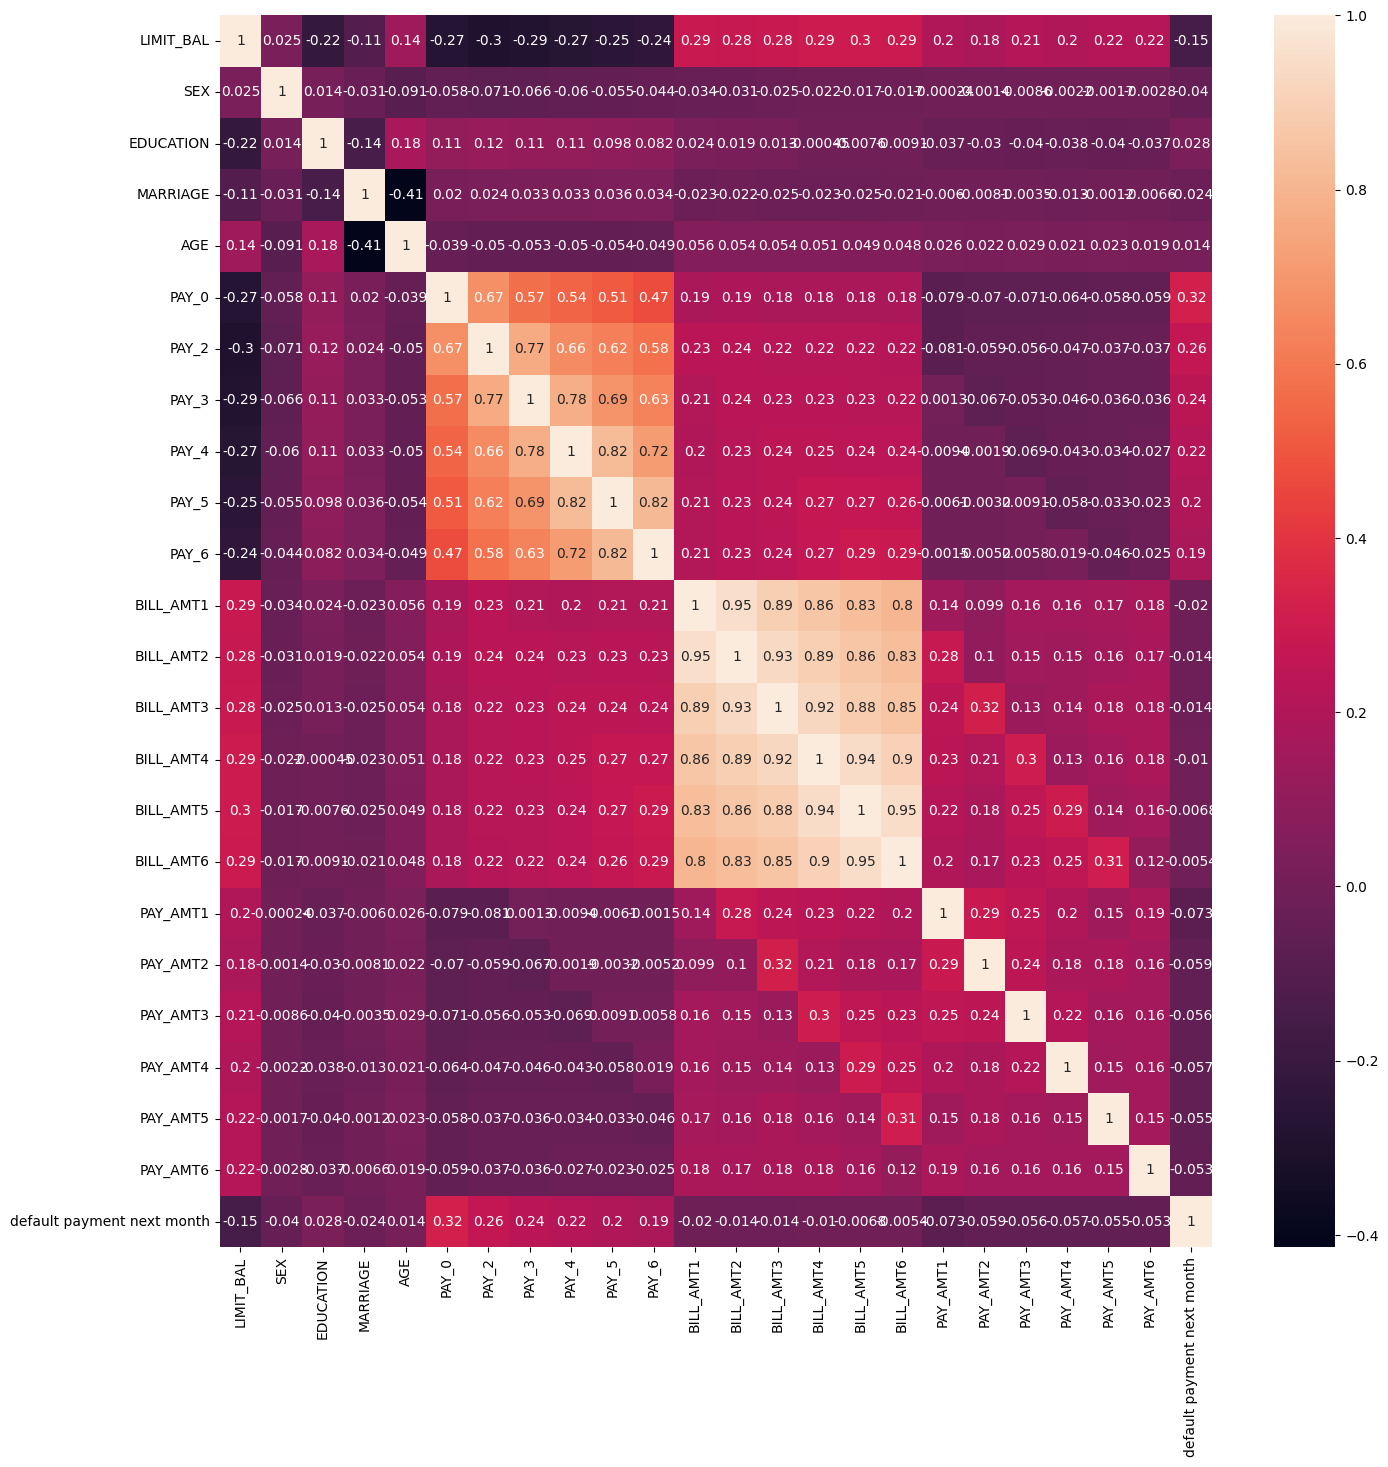

In [ ]:
# 상관분석(heatmap)

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 연체 여부와 그나마 연관성이 있는 feature는 상환 여부(PAY)정도가 있다.
# 그마저도 가장 최근 상환여부(PAY_0)이 가장 연관성이 높은데 0.32정도다.
# 그 외엔 딱히 보이지 않는다.

### 연체 여부

In [ ]:
# 채무 불이행 여부 컬럼 이름이 너무 길어서 바꿔줌.
df.rename(columns = {'default payment next month' : 'default'}, inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


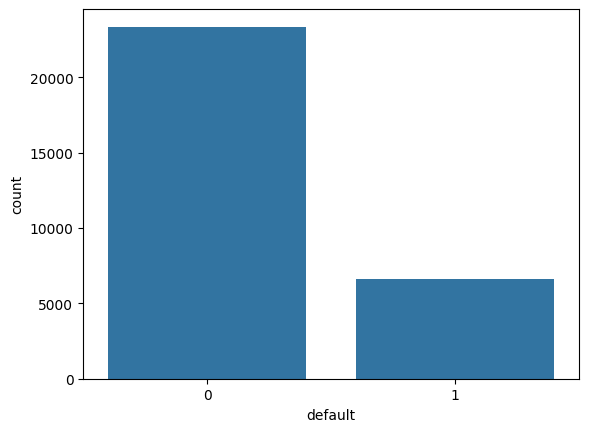

----------------------------------------------------------------------------------------------------


0    0.7788
1    0.2212
Name: default, dtype: float64

In [ ]:
# 전체 고객 중 빚쟁이가 얼마나 되는지 보자.
sns.countplot(data=df, x='default')
plt.show()
print('-'*100)
df.default.value_counts(normalize=True)

# 대략 전체 고객의 22%가 연체 고객.

# 아래부터는, 각 컬럼 별 연체 여부에 대해 알아보자.

### 각 컬럼별 연체여부

#### 신용한도

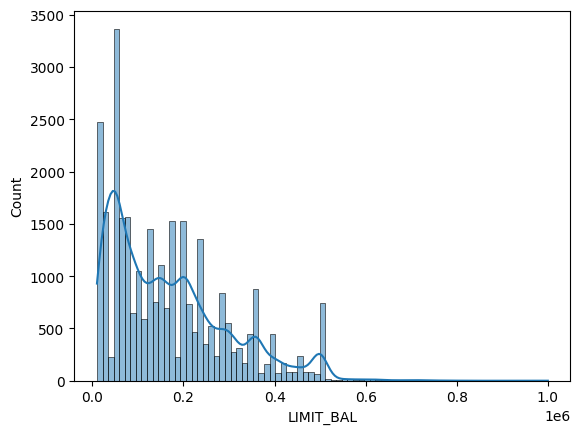

In [ ]:
# 신용한도LIMIT_BAL 분포는 어떨까?
sns.histplot(data=df, x='LIMIT_BAL', kde=True)
plt.show()

# 대략 20만 단위로 뚝 떨어지다가, 60만 이상은 거의 찾아볼 수 없다.
# 가장 많이 분포한 것은 0~20만 사이.
# 10만 단위로 나눠보자.

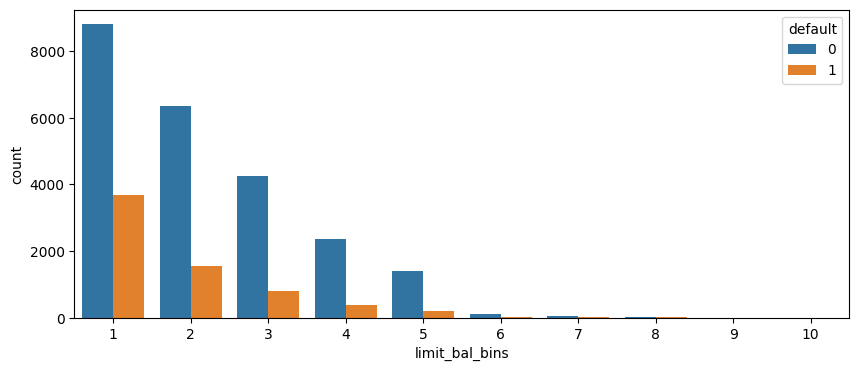

1     41.660000
2     26.266667
3     16.863333
4      9.196667
5      5.326667
6      0.423333
7      0.186667
8      0.073333
10     0.003333
9      0.000000
Name: limit_bal_bins, dtype: float64


,count,sum,ratio
limit_bal_bins,,,
1,12498,3684,29.5
2,7880,1535,19.5
3,5059,812,16.1
4,2759,388,14.1
5,1598,194,12.1
6,127,17,13.4
7,56,3,5.4
8,22,3,13.6
9,0,0,NaN


In [ ]:
df_copy = df.copy()

bins = [0, 100001, 200001, 300001, 400001, 500001, 600001, 700001, 800001, 900001, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_copy['limit_bal_bins'] = pd.cut(df_copy['LIMIT_BAL'], bins=bins, labels=labels)

plt.figure(figsize=(10,4))
sns.countplot(data=df_copy, x='limit_bal_bins', hue='default')
plt.show()
print('='*150)

print(100 * df_copy['limit_bal_bins'].value_counts(normalize=True))
print('='*150)

bal_default = df_copy.groupby('limit_bal_bins')['default'].agg(['count', 'sum'])
bal_default['ratio'] = round((bal_default['sum'] / bal_default['count']) * 100, 1)
bal_default


########## 정리 ##########
# 구간별로 거의 비슷비슷하게 줄어드는 느낌이다.
# 신용한도 0~10만과 1~20만인 고객이 대부분으로, 전체 고객의 절반 넘게(약 68%) 차지한다.

# 특이한 점은, 신용한도가 낮을수록 각 신용 한도당 연체자 비율이 높다는 것이다.
# 그 예로 신용한도 0~ 100000인 고객들은 거의 1/3이 연체자이며, 그 비율은 신용한도가 높아질수록 줄어든다.

#### 성별

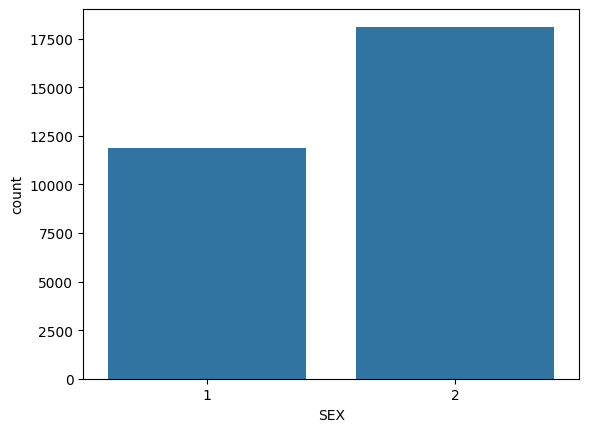

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [ ]:
# 남성 : 1, 여성 : 2

sns.countplot(data=df, x='SEX')
plt.show()
print('='*100)
df.SEX.value_counts(normalize=True)

# 여성이 더 많다. 여성:남성 = 60:40

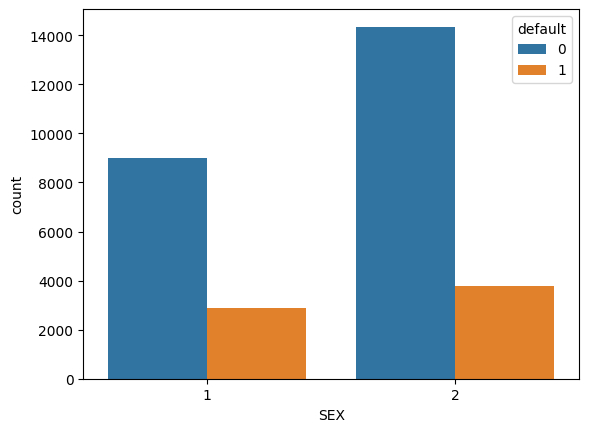

,count,sum,ratio
SEX,,,
1,11888,2873,24.2
2,18112,3763,20.8


In [ ]:
# 그렇다면 연체 여부와 그 비율은?

sns.countplot(data=df, x='SEX', hue='default')
plt.show()
print('='*150)

sex_default = df.groupby('SEX')['default'].agg(['count', 'sum'])
sex_default['ratio'] = round((sex_default['sum'] / sex_default['count']) * 100, 1)
sex_default

# 여성이 연체 여부가 좀 더 높다.
# 하지만 비율로 따진다면 남성이 24%, 여성이 20%정도로 남성의 연체비율이 더 높다.

########## 정리 ##########
# 1. 남성보다 여성이 더 많다
# 2. 많은 만큼 연체자도 더 많다
# 3. 그러나 비율로 따지면 남성의 연체자 비율이 더 높다

#### 결혼 여부

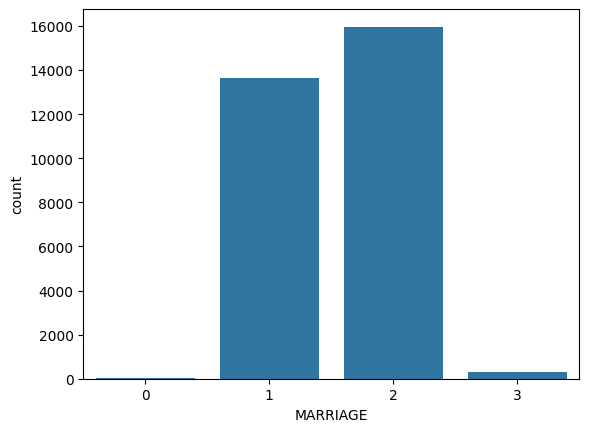

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [ ]:
# 기혼 : 1, 독신 : 2, 기타 : 3

sns.countplot(data=df, x='MARRIAGE')
plt.show()
print('='*100)
df.MARRIAGE.value_counts(normalize=True)

# 데이터 소개에는 없던 0이라는 값이 있다. 거의 없다시피 하니 3(기타)에 넣어주자.

In [ ]:
df['MARRIAGE'].replace(0, 3, inplace=True)
df.MARRIAGE.value_counts(normalize=True)

# 잘 합쳐졌다.
# 기타는 뭔지 잘 모르겠다(사별? 이혼?)
# 기타 제외, 기혼자가 45% 독신자가 53%로 독신이 좀 더 많다.

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

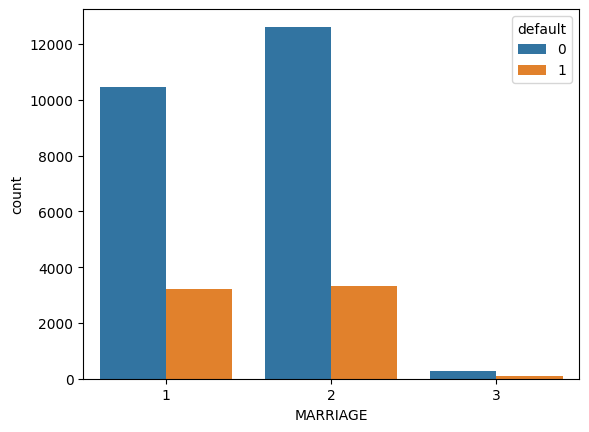

,count,sum,ratio
MARRIAGE,,,
1,13659,3206,23.5
2,15964,3341,20.9
3,377,89,23.6


In [ ]:
# 연체 여부와 그 비율은 어떨까?

sns.countplot(data=df, x='MARRIAGE', hue='default')
plt.show()
print('='*150)

marriage_default = df.groupby('MARRIAGE')['default'].agg(['count', 'sum'])
marriage_default['ratio'] = round((marriage_default['sum'] / marriage_default['count']) * 100, 1)
marriage_default


# 여기서도, 결혼 여부에 따른 연체 여부에 큰 차이는 보이지 않는다.
# 굳이 따져보자면, 독신자의 연체자 수가 좀 더 높다.

# 하지만 비율로 따진다면 기혼자의 연체 비율은 23%, 독신자의 연체 비율은 20%로 기혼자의 연체 비율이 더 높다.

#### 나이

In [ ]:
df.AGE.value_counts().sort_index()
# 21~79세까지 있다.
# 20대 후반~ 30대 후반까지가 제일 많은 것 같지만 한 눈에 보기가 힘들다.
# 연령대별로 나누어서 보자

21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [ ]:
bins = [20, 29, 39, 49, 59, np.inf]
labels = [2, 3, 4, 5, 6]

df_copy['age_bins'] = pd.cut(df_copy['AGE'], bins=bins, labels=labels)


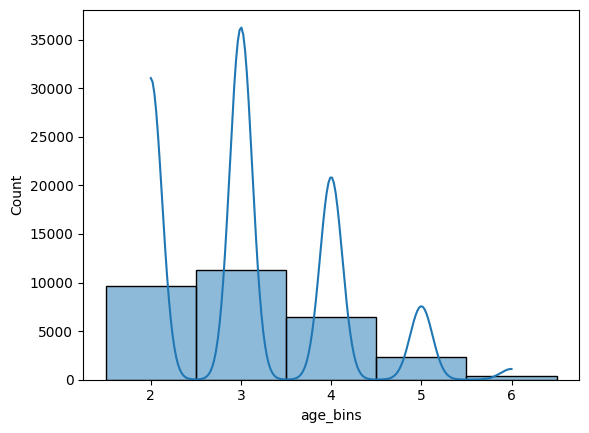

3    0.374600
2    0.320600
4    0.215467
5    0.078033
6    0.011300
Name: age_bins, dtype: float64

In [ ]:
sns.histplot(data=df_copy, x='age_bins', kde=True)
plt.show()
print('='*150)
df_copy['age_bins'].value_counts(normalize=True)

# 2~30대가 제일 많다. 둘이 합쳐 69%. 뒤로는 40대부터 나이순이다.

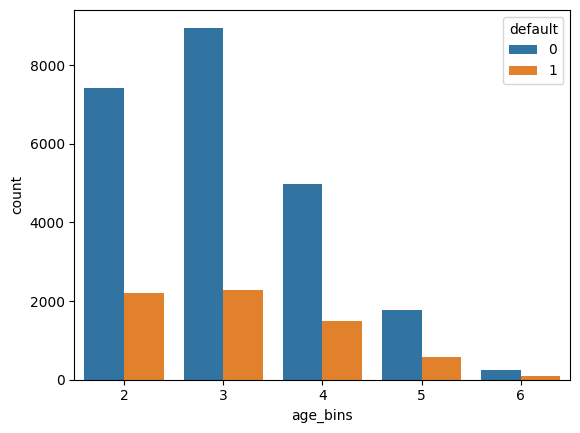

,count,sum,ratio
age_bins,,,
2,9618,2197,22.8
3,11238,2276,20.3
4,6464,1485,23.0
5,2341,582,24.9
6,339,96,28.3


In [ ]:
# 연체 여부와 그 비율은 어떨까?

sns.countplot(data=df_copy, x='age_bins', hue='default')
plt.show()
print('='*150)

age_default = df_copy.groupby('age_bins')['default'].agg(['count', 'sum'])
age_default['ratio'] = round((age_default['sum'] / age_default['count']) * 100, 1)
age_default

# 가장 많은 카드 이용자는 30대다.
# 젊은층 / 고령층으로 나눠 보면 젊은 층의 연체자가 좀 더 많은 듯 보인다
# 허나 비율을 따져보면, 2~30대보다 그 이상 고령층의 연체 비율이 더 높다.

#### 교육

In [ ]:
df['EDUCATION'].value_counts()
# 이번에도 데이터 설명에 없던 0이 있다.
# 4는 기타, 5와 6은 모름이고 0은 수가 그리 많지 않으니 4,5,6,0을 4(기타)로 합치자.

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['EDUCATION'].replace([4, 5, 6, 0], 4, inplace=True)
df['EDUCATION'].value_counts()

# 잘 합쳐졌다.

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

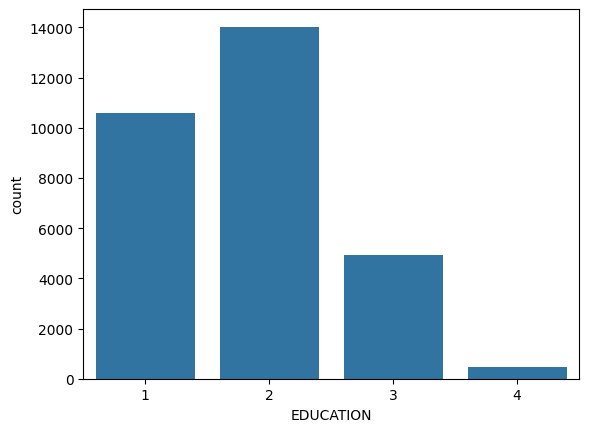

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

In [ ]:
sns.countplot(data=df, x='EDUCATION')
plt.show()
print('='*100)
df['EDUCATION'].value_counts(normalize=True)
# 1-대학원, 2-대학교, 3-고등학교, 4-기타, 5-모름, 6-모름
# 대졸이 가장 많고 그 다음은 대학원졸, 고졸, 기타 순이다.
# 대졸과 대학원졸이 대부분이다. 둘이 합쳐 82%

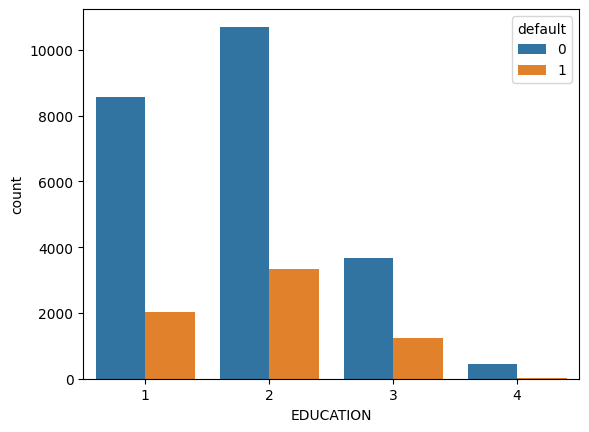

,count,sum,ratio
EDUCATION,,,
1,10585,2036,19.2
2,14030,3330,23.7
3,4917,1237,25.2
4,468,33,7.1


In [ ]:
# 연체 여부와 그 비율은 어떨까?
sns.countplot(data=df, x='EDUCATION', hue='default')
plt.show()
print('='*150)

edu_default = df.groupby('EDUCATION')['default'].agg(['count', 'sum'])
edu_default['ratio'] = round((edu_default['sum'] / edu_default['count']) * 100, 1)
edu_default

# 고졸 연체자가 제일 많다
# 비율을 따져보면 대학원졸 연체자는 19%, 대졸 연체자는 24%, 고졸 연체자는 25% 정도다.
# 고학력자 / 저학력자로 나눈다면, 고학력자보다 저학력자의 연체 비율이 더 높다고 할 수 있겠다.

### 청구금액

In [ ]:
# BILL_AMT1	05년9월 청구서 금액
# BILL_AMT2	05년8월 청구서 금액
# BILL_AMT3	05년7월 청구서 금액
# BILL_AMT4	05년6월 청구서 금액
# BILL_AMT5	05년5월 청구서 금액
# BILL_AMT6	05년4월 청구서 금액

# 청구금액이 보기 불편하다. 컬럼명 변경
# 바꾸는 김에 pay, pat_amt도 다 바꾸자.

# PAY_0	05년9월 상환상태
# PAY_2	05년8월 상환상태
# PAY_3	05년7월 상환상태
# PAY_4	05년6월 상환상태
# PAY_5	05년5월 상환상태
# PAY_6	05년4월 상환상태
# PAY_AMT1	05년9월 지불금액
# PAY_AMT2	05년8월 지불금액
# PAY_AMT3	05년7월 지불금액
# PAY_AMT4	05년6월 지불금액
# PAY_AMT5	05년5월 지불금액
# PAY_AMT6	05년4월 지불금액

df.rename(columns = {'BILL_AMT1':'bill_09', 'BILL_AMT2':'bill_08', 'BILL_AMT3':'bill_07', 'BILL_AMT4':'bill_06', 'BILL_AMT5':'bill_05', 'BILL_AMT6':'bill_04'}, inplace=True)
df.rename(columns = {'PAY_0':'pay_09', 'PAY_2':'pay_08', 'PAY_3':'pay_07', 'PAY_4':'pay_06', 'PAY_5':'pay_05', 'PAY_6':'pay_04'}, inplace=True)
df.rename(columns = {'PAY_AMT1':'pay_amt_09', 'PAY_AMT2':'pay_amt_08', 'PAY_AMT3':'pay_amt_07', 'PAY_AMT4':'pay_amt_06', 'PAY_AMT5':'pay_amt_05', 'PAY_AMT6':'pay_amt_04'}, inplace=True)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_09,pay_08,pay_07,pay_06,pay_05,pay_04,bill_09,bill_08,bill_07,bill_06,bill_05,bill_04,pay_amt_09,pay_amt_08,pay_amt_07,pay_amt_06,pay_amt_05,pay_amt_04,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_09', 'pay_08',
       'pay_07', 'pay_06', 'pay_05', 'pay_04', 'bill_09', 'bill_08', 'bill_07',
       'bill_06', 'bill_05', 'bill_04', 'pay_amt_09', 'pay_amt_08',
       'pay_amt_07', 'pay_amt_06', 'pay_amt_05', 'pay_amt_04', 'default'],
      dtype='object')

In [ ]:
df_bills = df[['bill_09', 'bill_08', 'bill_07',
       'bill_06', 'bill_05', 'bill_04']]

df_bills.head()

,bill_09,bill_08,bill_07,bill_06,bill_05,bill_04
ID,,,,,,
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


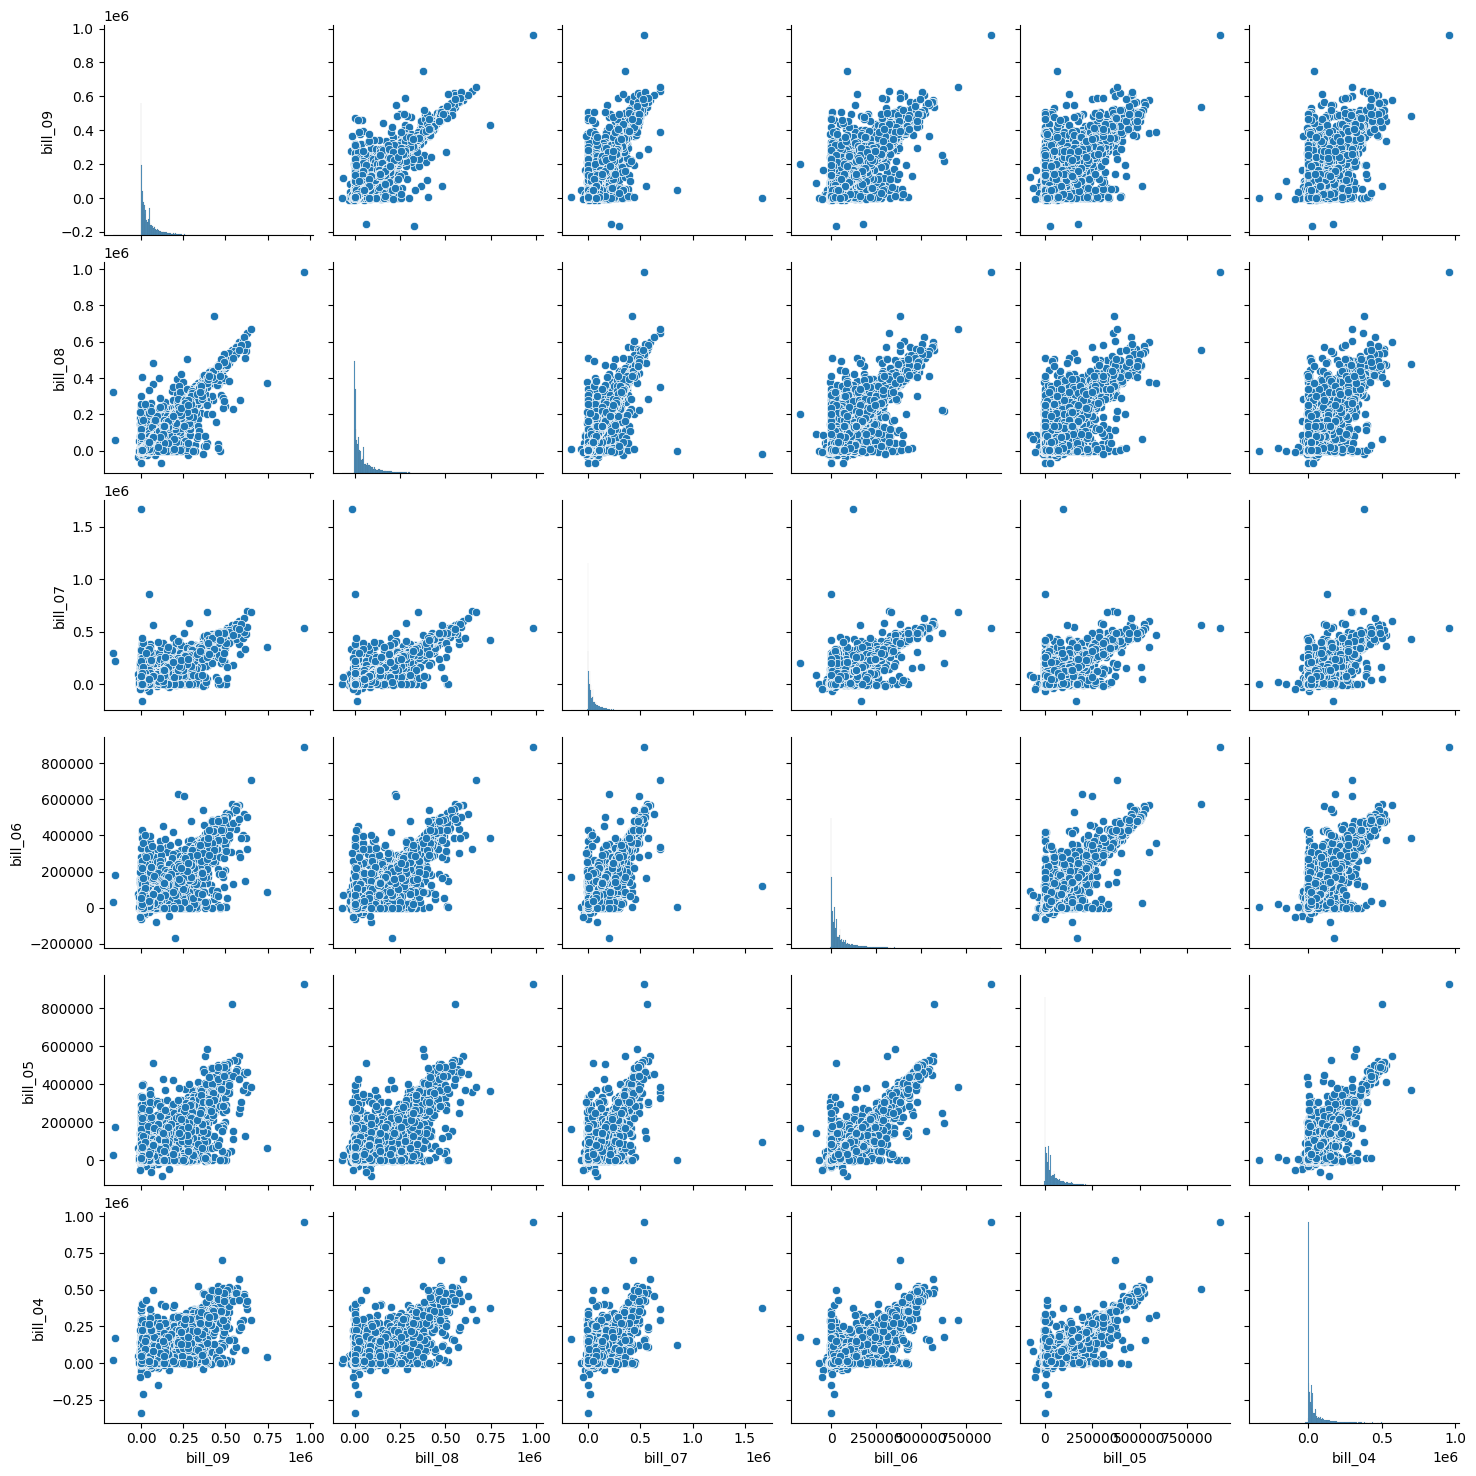

In [ ]:
sns.pairplot(data=df_bills)
plt.show()

# 아래 그래프는 고객 별 각 월의 청구금액 간 관계를 보여준다.
# 거의 대부분의 산점도에서 우상향 하는 추세가 보인다

# 이 말은, 고객별로 매달 내는 청구금액이 큰 차이가 없음을 말한다.
# 예를 들어 어떤 고객의 4월 청구금액이 만원이었다면, 5월~9월 청구금액도 그와 크게 다르지는 않다는 말이다.
# 즉 쭉 적게 내는 사람들은 쭉 적게 내고, 쭉 많이 내는 사람들은 쭉 많이 내는 것.

# 우하단 대각선 방향의 그래프는 해당 컬럼의 분포를 보여준다. 모든 컬럼의 데이터가 굉장히 편향되어있음을 볼 수 있다.

### 상환상태

In [ ]:
pay = ['pay_09', 'pay_08',
       'pay_07', 'pay_06', 'pay_05', 'pay_04']

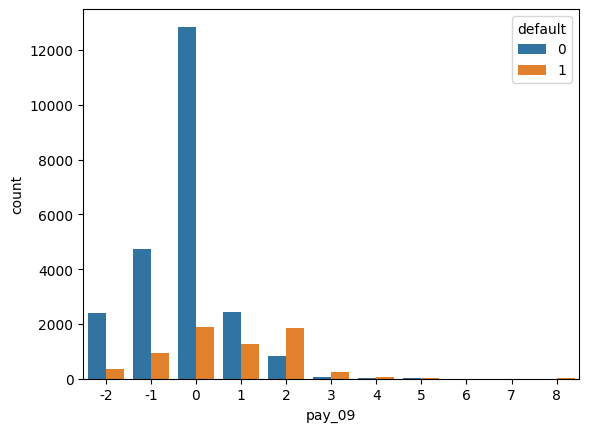

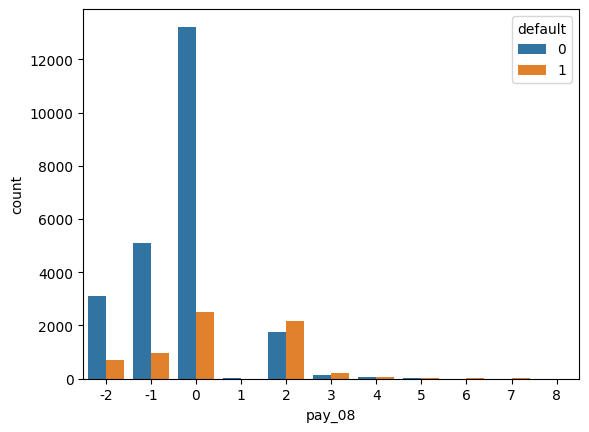

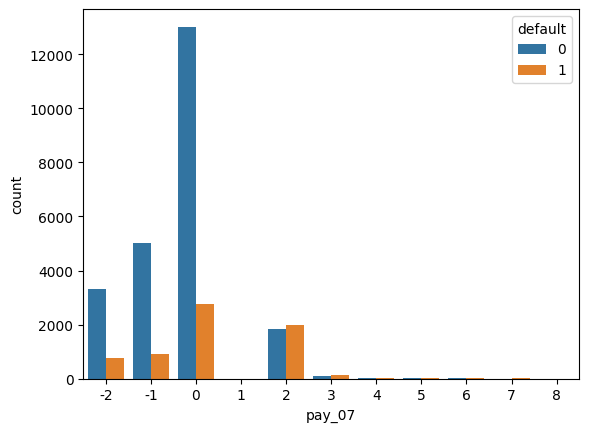

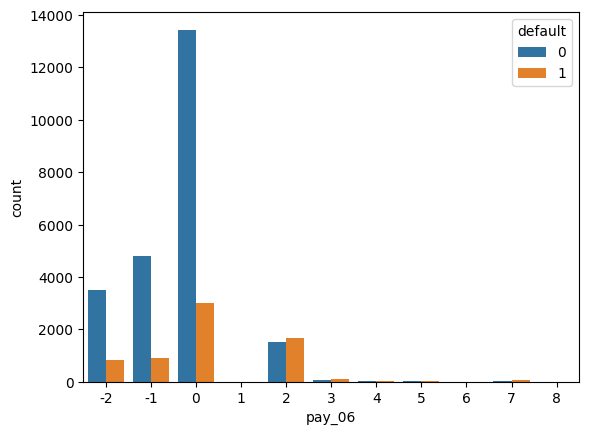

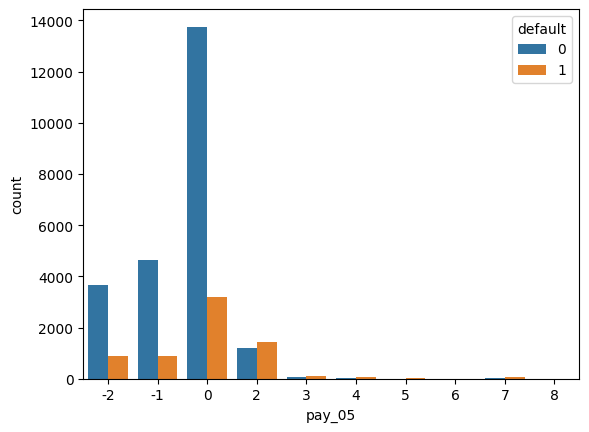

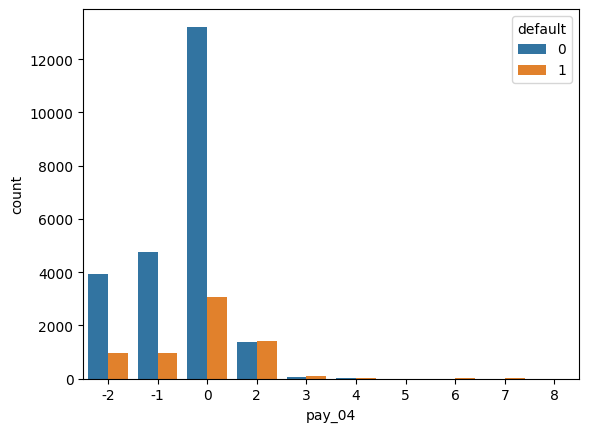

In [ ]:
# (-2-무소비, -1-정액 결제, 0-리볼빙크레딧, 1-한달 지연, ..., 9-9개월 지불지연)

# 각 월별 상환상태별로 연체자가 얼마나 되는지 확인해보자.

for col in pay:
    sns.countplot(data=df, x=col, hue='default');
    plt.show()

# 우선 4~9월의 상환상태 중 리볼빙크레딧이 압도적으로 많다
# 그 다음은 무소비(-2), 정액 결제(-1)고 한달 지연, 2달 지연... 순이다.

# 눈에 띄는 점은 4~9월 기준으로 상환이 지연된 고객 중 2달 이상 지연된 고객은 거의 없고, 상환이 지연된 고객의 대부분은 2달 지연된 고객이라는 것이며
# 상환이 2달 이상(2달 지연, 3달 지연, ...) 늦은 고객들은 비 연체자보다 연체자가 더 많았다는 것이다. 그리고 그 차이(비 연체자와 연체자의 차이)는 최근으로 올 수록(4월->9월) 커진다.

# 생각해볼 점?
# 왜 상환이 지연된 고객들 중 2달 지연된 고객이 제일 많을까? 2달이 뭔가 심리적 limit이거나 제도적 limit일 수도 있겠다.
# 상환 지연된 고객은 연체자 비율이 대부분 더 높았다. 상환할 돈이 없으니 연체된 것이겠지.. 하고 생각해볼 수 있다.

### 최종 정리

In [ ]:
########## 정리 ##########

# 신용한도 : 신용한도 0~10만, 1~20만인 고객이 대부분(68%)이었다. 신용한도가 낮을수록 연체자 비율이 높았으며, 특히 신용한도 0~10만인 고객들은 1/3이 연체자였다. 연체자 비율은 신용한도가 높을수록 줄어들었다.
# 성별 : 남성보다 여성 카드 이용 고객이 많았다. 그런 만큼 연체자도 남성보다 많았지만, 연체자 비율은 남성이 더 높았다.
# 결혼여부 : 기혼자의 연체자 비율이 더 높다
# 나이 : 카드 이용자는 젊은 층, 특히 30대가 제일 많았지만 반대로 연체자 비율은 30대가 제일 낮았다. 고령층인 경우가 연체 비율이 더 높았으며 나이가 많을 수록 연체자 비율이 높아졌다.
# 교육 : 카드 이용자는 고학력자(대졸, 대학원졸)가 대부분이었다. 총 82%. 그런 만큼 연체자 수도 고학력자에서 많았지만, 연체자 비율은 고졸 고객에서 제일 높았다.
# 상환 상태 : 상환이 2달 밀린 고객들은, 지금까지 EDA를 했던 모든 컬럼 중 유일하게 연체자가 비 연체자보다 높았다.


## 데이터 불균형 해소

In [ ]:
# 전체 고객 중 default인 고객은 22% 정도고, 그 마저도 컬럼별로 분리해서 본다면 그 불균형은 더 커진다
# 그래서 SMOTE 기법으로 불균형을 해소해 줄 것이다.

In [ ]:
df.iloc[:,0:-1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_09,pay_08,pay_07,pay_06,pay_05,pay_04,bill_09,bill_08,bill_07,bill_06,bill_05,bill_04,pay_amt_09,pay_amt_08,pay_amt_07,pay_amt_06,pay_amt_05,pay_amt_04
ID,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(df.iloc[:,:-1], df['default'])

print(len(df))
print(len(y_smote))

30000
46728


In [ ]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default, Length: 46728, dtype: int64

In [ ]:
x_smote

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_09,pay_08,pay_07,pay_06,pay_05,pay_04,bill_09,bill_08,bill_07,bill_06,bill_05,bill_04,pay_amt_09,pay_amt_08,pay_amt_07,pay_amt_06,pay_amt_05,pay_amt_04
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,150000,1,2,1,30,0,0,0,0,0,0,144195,141488,140008,140720,142972,110061,6075,4929,4924,9201,4705,3536
46724,20000,1,1,2,41,0,0,0,0,0,0,19619,19954,20132,20585,19956,15822,1416,1243,1383,421,416,3916
46725,50000,2,2,1,43,0,0,0,0,0,0,34353,26746,25489,20531,21147,21652,1465,1524,734,946,950,791
46726,180000,2,1,1,37,2,0,-1,-1,-1,0,914,130,130,192,406,1886,130,130,192,406,1611,1929


In [ ]:
balanced_df = x_smote
balanced_df['default'] = y_smote
balanced_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_09,pay_08,pay_07,pay_06,pay_05,pay_04,bill_09,bill_08,bill_07,bill_06,bill_05,bill_04,pay_amt_09,pay_amt_08,pay_amt_07,pay_amt_06,pay_amt_05,pay_amt_04,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,150000,1,2,1,30,0,0,0,0,0,0,144195,141488,140008,140720,142972,110061,6075,4929,4924,9201,4705,3536,1
46724,20000,1,1,2,41,0,0,0,0,0,0,19619,19954,20132,20585,19956,15822,1416,1243,1383,421,416,3916,1
46725,50000,2,2,1,43,0,0,0,0,0,0,34353,26746,25489,20531,21147,21652,1465,1524,734,946,950,791,1
46726,180000,2,1,1,37,2,0,-1,-1,-1,0,914,130,130,192,406,1886,130,130,192,406,1611,1929,1


<Axes: xlabel='default', ylabel='count'>

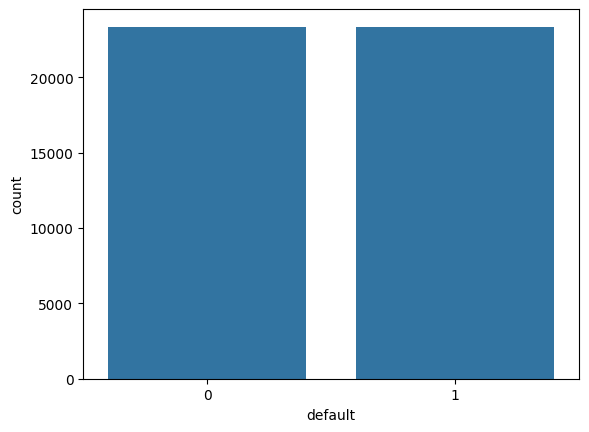

In [ ]:
sns.countplot(data=balanced_df, x='default')
# 잘 맞춰졌다.

## feature engineering

In [ ]:
# 위에서 이미 feature engineering의 일환으로 결혼 여부와 교육에서 데이터 설명에 속하지 않는 값들을 처리해 주었다.
# 추가로 더 조정해야 할 feature가 있을까? 혹은 새롭게 생성하면 좋을 feature가 있을까? 생각해 볼 문제다.

## XGBoost

In [ ]:
# XGBoost에 데이터를 학습시켜 고객별 연체 여부를 예측하는 모델을 만들어볼 것이다.
# 우선 balanced 데이터가 아닌 imbalanced 데이터를 사용해보자.

In [ ]:
x_data = df.drop(['default'], axis=1)
y_data = df['default']

In [ ]:
print(x_data.shape)
print(y_data.shape)

(30000, 23)
(30000,)


In [ ]:
# train test 데이터 나누기. 비율은 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


In [ ]:
from xgboost import XGBClassifier

xgb_default = XGBClassifier(learning_rate=0.2, max_depth=7, booster='gbtree', n_estimators=100, eval_metric='auc', random_state=42)

In [ ]:
xgb_default.get_params()

# 'objective': 'binary:logistic' => 이진분류시 사용하는 목적함수(이것이 기본값)
# 'booster': 'gbtree' => 트리 기반 booster를 gbtree(Gradient Boosting Tree)로 사용(이것이 기본값)
# 'n_estimators': 100 => 트리 개수를 100개로 지정(이것이 기본값)
# 'eval_metric': 'auc' => 모델 성능 평가 기준을 auc로 정함. 기본값은 error지만, 불균형한 데이터셋에선 auc가 더 좋다.

# 위의 기본값이 정해진 파라미터들은 딱히 지정해주지 않아도 기본값으로 설정되지만, get_params()로 출력해보면 None이 뜬다.
# None이 뜨더라도 아무 값도 없는 것이 아니고 기본값으로 지정된 것이니 안심하고 써도 되지만, 보기 편하라고 지정해 주었다.

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'verbose': True}

In [ ]:
# 데이터 학습
xgb_default.fit(x_train, y_train, eval_set=[(x_test, y_test)])

[0]	validation_0-auc:0.74949
[1]	validation_0-auc:0.76329
[2]	validation_0-auc:0.76537
[3]	validation_0-auc:0.76870
[4]	validation_0-auc:0.77110
[5]	validation_0-auc:0.77110
[6]	validation_0-auc:0.77272
[7]	validation_0-auc:0.77226
[8]	validation_0-auc:0.77340
[9]	validation_0-auc:0.77208
[10]	validation_0-auc:0.77265
[11]	validation_0-auc:0.77338
[12]	validation_0-auc:0.77405
[13]	validation_0-auc:0.77355
[14]	validation_0-auc:0.77384
[15]	validation_0-auc:0.77416
[16]	validation_0-auc:0.77340
[17]	validation_0-auc:0.77276
[18]	validation_0-auc:0.77247
[19]	validation_0-auc:0.77273
[20]	validation_0-auc:0.77200
[21]	validation_0-auc:0.77184
[22]	validation_0-auc:0.77158
[23]	validation_0-auc:0.77177
[24]	validation_0-auc:0.77223
[25]	validation_0-auc:0.77183
[26]	validation_0-auc:0.77173
[27]	validation_0-auc:0.77146
[28]	validation_0-auc:0.77089
[29]	validation_0-auc:0.77062
[30]	validation_0-auc:0.77081
[31]	validation_0-auc:0.77101
[32]	validation_0-auc:0.77126
[33]	validation_0-au

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 예측!
pred_train = xgb_default.predict(x_train)
pred_test = xgb_default.predict(x_test)

In [ ]:
# 예측!
pred_train = xgb_default.predict(x_train)
pred_test = xgb_default.predict(x_test)

# 성능 평가! 평가는 roc auc로 한다. 연체자가 비 연체자에 비해 적었기 때문.

from sklearn.metrics import roc_auc_score

pred_train_proba = xgb_default.predict_proba(x_train)
pred_test_proba = xgb_default.predict_proba(x_test)

print(pred_train)
print('='*100)
print(pred_train_proba)


pred_test_proba = xgb_default.predict_proba(x_test)[:, 1]
auc_test= roc_auc_score(y_test, pred_test_proba)
print(f"ROC AUC: {auc_test}")

# proba 설명
# 리스트를 원소로 갖는 리스트 형태의 데이터다.
# 각 원소에 해당하는 리스트에는 2개의 값이 있는데, 이는 y data 값이 2개이기 때문(0 or 1). 즉 이진분류 문제라서 그렇다.

# 어떻게 해석해야 하는가?
# 첫 번쨰 원소를 보자. [0.9704362  0.02956381] 이렇게 되어 있다
# 이건 무슨 뜻인가, 하면 첫번째 x_data의 y값이 각각 0일 확률과 1일 확률을 의미한다.
# 좀 더 풀어서 설명하자면, 모델이 첫 번째 x_data의 y값이 0인지 1인지를 예측했는데, 0일 확률은 97%고 1일 확률은 3%였다는 말이다
# 그래서 pred_train의 첫 번째 출력값을 보면 0으로 되어 있는 것을 볼 수 있다.

# 이걸 왜 쓰는가?
# 성능 평가 기준으로 정한 roc auc는 입력값을 확률로 받기 때문이다.

[0 0 0 ... 0 0 0]
[[0.9704362  0.02956381]
 [0.671767   0.32823297]
 [0.93083054 0.06916946]
 ...
 [0.956427   0.04357303]
 [0.67384636 0.32615367]
 [0.806254   0.19374596]]


In [ ]:
# 이제 진짜 성능을 평가해 보자.

pred_test_proba = xgb_default.predict_proba(x_test)[:, 1]
auc_test= roc_auc_score(y_test, pred_test_proba)
print(f"ROC AUC: {auc_test}")

# 0.76 ... 값이 좋지 않다.
# 하이퍼 파라미터 튜닝으로 성능을 올려 보자.

ROC AUC: 0.7606914092442958


## Hyperparameter tuning : Optuna

In [ ]:
# GridSearchCV를 쓸 까 했으나, 이 방법은 가능한 하이퍼파라미터의 모든 조합을 다 보는 것이라서 오래 걸리므로 현업에선 잘 쓰지 않는다고 한다.
# 해서 Optuna를 쓰기로 결정했다.

In [ ]:
# !pip install optuna
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_uniform('gamma', 0, 0.5),
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(x_train, y_train)

    y_pred_proba = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return roc_auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('최적의 하이퍼파라미터 : ', study.best_trial.params)

[I 2024-02-09 11:20:47,505] A new study created in memory with name: no-name-9c46ae58-0778-44c3-98b5-61104e82bcc9
[I 2024-02-09 11:20:47,804] Trial 0 finished with value: 0.7805484575008999 and parameters: {'n_estimators': 95, 'max_depth': 5, 'learning_rate': 0.04056667677472546, 'subsample': 0.6461432366342919, 'colsample_bytree': 0.6944913940352501, 'gamma': 0.4131624164636732}. Best is trial 0 with value: 0.7805484575008999.
[I 2024-02-09 11:20:48,538] Trial 1 finished with value: 0.7586377248051386 and parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.20407035095867343, 'subsample': 0.8131061957340434, 'colsample_bytree': 0.8321313103841604, 'gamma': 0.20210743061112796}. Best is trial 0 with value: 0.7805484575008999.
[I 2024-02-09 11:20:48,903] Trial 2 finished with value: 0.7782655707281426 and parameters: {'n_estimators': 83, 'max_depth': 6, 'learning_rate': 0.10441467111322729, 'subsample': 0.850608055012273, 'colsample_bytree': 0.8749701335267046, 'gamma': 

최적의 하이퍼파라미터 :  {'n_estimators': 252, 'max_depth': 4, 'learning_rate': 0.03524199095257873, 'subsample': 0.8144014850252683, 'colsample_bytree': 0.6476586948551338, 'gamma': 0.282720619131256}


In [ ]:
# 위에서 구한 최적의 하이퍼파라미터로 다시 xgbclassifier 객체를 만들고, 학습시키고, 예측하고, 성능 평가까지 해보자.

# 객체 생성
best_xgb_default = XGBClassifier(learning_rate=0.035, max_depth=4, n_estimators=252, eval_metric='auc', subsample=0.814, colsample_bytree=0.647, gamma=0.28, random_state=42)

# 데이터 학습
best_xgb_default.fit(x_train, y_train, eval_set=[(x_test, y_test)])

# 예측
best_pred_train = best_xgb_default.predict(x_train)
best_pred_test = best_xgb_default.predict(x_test)

# 성능 평가
best_pred_test_proba = best_xgb_default.predict_proba(x_test)[:, 1]
best_auc_test= roc_auc_score(y_test, best_pred_test_proba)
print(f"ROC AUC: {best_auc_test}")

[0]	validation_0-auc:0.73965
[1]	validation_0-auc:0.74799
[2]	validation_0-auc:0.75009
[3]	validation_0-auc:0.75154
[4]	validation_0-auc:0.75238
[5]	validation_0-auc:0.75288
[6]	validation_0-auc:0.75437
[7]	validation_0-auc:0.75840
[8]	validation_0-auc:0.76133
[9]	validation_0-auc:0.76123
[10]	validation_0-auc:0.76193
[11]	validation_0-auc:0.76310
[12]	validation_0-auc:0.76371
[13]	validation_0-auc:0.76410
[14]	validation_0-auc:0.76423
[15]	validation_0-auc:0.76454
[16]	validation_0-auc:0.76450
[17]	validation_0-auc:0.76424
[18]	validation_0-auc:0.76431
[19]	validation_0-auc:0.76430
[20]	validation_0-auc:0.76482
[21]	validation_0-auc:0.76627
[22]	validation_0-auc:0.76608
[23]	validation_0-auc:0.76645
[24]	validation_0-auc:0.76645
[25]	validation_0-auc:0.76705
[26]	validation_0-auc:0.76770
[27]	validation_0-auc:0.76790
[28]	validation_0-auc:0.76835
[29]	validation_0-auc:0.76859
[30]	validation_0-auc:0.76904
[31]	validation_0-auc:0.76919
[32]	validation_0-auc:0.76972
[33]	validation_0-au

In [ ]:
# roc auc 값이 0.78이다. 썩 좋은 값은 아닌 것 같다.

## 파라미터 중요도 알아보기

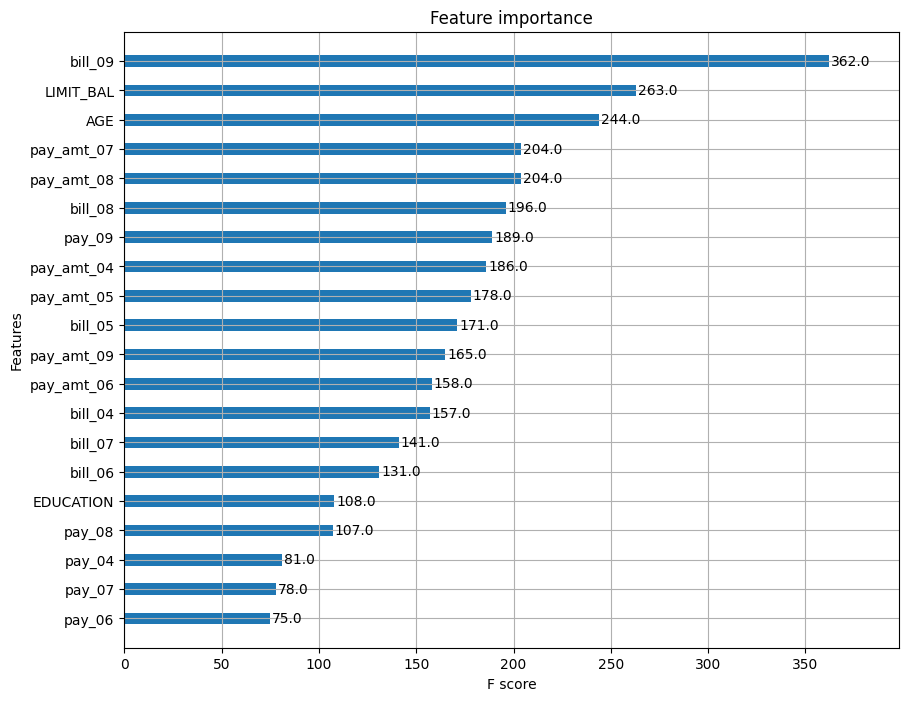

In [ ]:
# 파라미터의 중요도를 알아보자.
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(best_xgb_default, ax=ax, max_num_features=20, height=0.4)
plt.show()


# 가장 최근의 청구서 금액이 연체 여부를 판단하는 데에 가장 중요하게 쓰인 파라미터임을 알 수 있다.
# 그 다음으로는 신용 한도, 나이 등이 있다.

## balanced df로 학습하고 이것저것 해보기

In [ ]:
# 이번엔 balanced 데이터를 사용해볼 것이다. 과정은 동일하게.
# 과연 모델 정확도가 어느 정도일지??

In [ ]:
balanced_x_data = balanced_df.drop(['default'], axis=1)
balanced_y_data = balanced_df['default']

print(balanced_x_data.shape)
print(balanced_y_data.shape)

(46728, 23)
(46728,)


In [ ]:
# train test 데이터 나누기. 비율은 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(balanced_x_data, balanced_y_data, test_size=0.3, random_state=42, stratify=balanced_y_data)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32709, 23)
(32709,)
(14019, 23)
(14019,)


In [ ]:
from xgboost import XGBClassifier

xgb_default = XGBClassifier(learning_rate=0.2, max_depth=7, booster='gbtree', n_estimators=100, eval_metric='auc', random_state=42)

In [ ]:
# 데이터 학습
xgb_default.fit(x_train, y_train, eval_set=[(x_test, y_test)])

[0]	validation_0-auc:0.81492
[1]	validation_0-auc:0.82577
[2]	validation_0-auc:0.83360
[3]	validation_0-auc:0.83728
[4]	validation_0-auc:0.84396
[5]	validation_0-auc:0.84776
[6]	validation_0-auc:0.85179
[7]	validation_0-auc:0.85444
[8]	validation_0-auc:0.85791
[9]	validation_0-auc:0.85988
[10]	validation_0-auc:0.86140
[11]	validation_0-auc:0.86374
[12]	validation_0-auc:0.86591
[13]	validation_0-auc:0.86739
[14]	validation_0-auc:0.86968
[15]	validation_0-auc:0.87012
[16]	validation_0-auc:0.87224
[17]	validation_0-auc:0.87369
[18]	validation_0-auc:0.87483
[19]	validation_0-auc:0.87566
[20]	validation_0-auc:0.87701
[21]	validation_0-auc:0.87782
[22]	validation_0-auc:0.87902
[23]	validation_0-auc:0.88003
[24]	validation_0-auc:0.88099
[25]	validation_0-auc:0.88219
[26]	validation_0-auc:0.88346
[27]	validation_0-auc:0.88412
[28]	validation_0-auc:0.88521
[29]	validation_0-auc:0.88617
[30]	validation_0-auc:0.88670
[31]	validation_0-auc:0.88716
[32]	validation_0-auc:0.88864
[33]	validation_0-au

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 예측!
pred_train = xgb_default.predict(x_train)
pred_test = xgb_default.predict(x_test)

# 성능 평가! 평가는 roc auc로 한다. 연체자가 비 연체자에 비해 적었기 때문.
# 참고 : https://nicola-ml.tistory.com/102

from sklearn.metrics import roc_auc_score

pred_train_proba = xgb_default.predict_proba(x_train)
pred_test_proba = xgb_default.predict_proba(x_test)

print(pred_train)
print('='*100)
print(pred_train_proba)
print('='*100)

pred_test_proba = xgb_default.predict_proba(x_test)[:, 1]
auc_test= roc_auc_score(y_test, pred_test_proba)
print(f"ROC AUC: {auc_test}")

[1 1 0 ... 0 0 1]
[[6.3949823e-04 9.9936050e-01]
 [3.0855715e-01 6.9144285e-01]
 [9.8001915e-01 1.9980833e-02]
 ...
 [9.5824587e-01 4.1754123e-02]
 [8.2817554e-01 1.7182446e-01]
 [3.6005497e-02 9.6399450e-01]]
ROC AUC: 0.9079495610799158


In [ ]:
!pip install optuna
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_uniform('gamma', 0, 0.5),
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(x_train, y_train)

    y_pred_proba = model.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return roc_auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('최적의 하이퍼파라미터 : ', study.best_trial.params)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


[I 2024-02-13 05:36:40,301] A new study created in memory with name: no-name-d61d6e93-8697-4825-9d51-0f57f9ae11f3
[I 2024-02-13 05:36:42,319] Trial 0 finished with value: 0.8860972106578275 and parameters: {'n_estimators': 149, 'max_depth': 3, 'learning_rate': 0.27141989402831335, 'subsample': 0.707197578051803, 'colsample_bytree': 0.8339617398862222, 'gamma': 0.20755535578243933}. Best is trial 0 with value: 0.8860972106578275.
[I 2024-02-13 05:36:44,649] Trial 1 finished with value: 0.8870030360394593 and parameters: {'n_estimators': 93, 'max_depth': 10, 'learning_rate': 0.017107885077052198, 'subsample': 0.6181338081631372, 'colsample_bytree': 0.6090464983772684, 'gamma': 0.4990565762721787}. Best is trial 1 with value: 0.8870030360394593.
[I 2024-02-13 05:36:45,128] Trial 2 finished with value: 0.891523991265357 and parameters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.2908257666927801, 'subsample': 0.6652340231448453, 'colsample_bytree': 0.8683627501457252, 'gamma': 

최적의 하이퍼파라미터 :  {'n_estimators': 262, 'max_depth': 10, 'learning_rate': 0.15803390875703663, 'subsample': 0.734135923997726, 'colsample_bytree': 0.8327139184016328, 'gamma': 0.3081128253847699}


In [ ]:
# 위에서 구한 최적의 하이퍼파라미터로 다시 xgbclassifier 객체를 만들고, 학습시키고, 예측하고, 성능 평가까지 해보자.


# 객체 생성
best_xgb_default = XGBClassifier(learning_rate=0.158, max_depth=10, n_estimators=262, eval_metric='auc', subsample=0.734, colsample_bytree=0.832, gamma=0.308, random_state=42)

# 데이터 학습
best_xgb_default.fit(x_train, y_train, eval_set=[(x_test, y_test)])

# 예측
best_pred_train = best_xgb_default.predict(x_train)
best_pred_test = best_xgb_default.predict(x_test)

# 성능 평가
best_pred_test_proba = best_xgb_default.predict_proba(x_test)[:, 1]
best_auc_test= roc_auc_score(y_test, best_pred_test_proba)
print(f"ROC AUC: {best_auc_test}")

[0]	validation_0-auc:0.81862
[1]	validation_0-auc:0.83996
[2]	validation_0-auc:0.85310
[3]	validation_0-auc:0.85755
[4]	validation_0-auc:0.86041
[5]	validation_0-auc:0.86498
[6]	validation_0-auc:0.86622
[7]	validation_0-auc:0.86899
[8]	validation_0-auc:0.87255
[9]	validation_0-auc:0.87544
[10]	validation_0-auc:0.87647
[11]	validation_0-auc:0.87777
[12]	validation_0-auc:0.87881
[13]	validation_0-auc:0.88000
[14]	validation_0-auc:0.88188
[15]	validation_0-auc:0.88380
[16]	validation_0-auc:0.88512
[17]	validation_0-auc:0.88576
[18]	validation_0-auc:0.88672
[19]	validation_0-auc:0.88729
[20]	validation_0-auc:0.88873
[21]	validation_0-auc:0.88954
[22]	validation_0-auc:0.89051
[23]	validation_0-auc:0.89108
[24]	validation_0-auc:0.89208
[25]	validation_0-auc:0.89303
[26]	validation_0-auc:0.89428
[27]	validation_0-auc:0.89522
[28]	validation_0-auc:0.89555
[29]	validation_0-auc:0.89634
[30]	validation_0-auc:0.89688
[31]	validation_0-auc:0.89787
[32]	validation_0-auc:0.89883
[33]	validation_0-au

In [ ]:
# roc auc가 0.92로, 해당 모델은 좋은 성능을 보인다고 할 수 있다.

In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

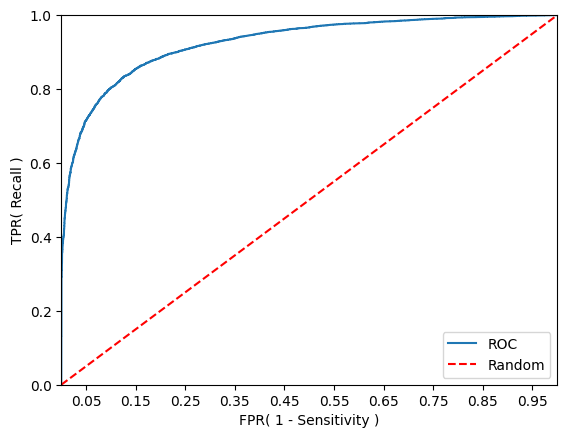

In [ ]:
roc_curve_plot(y_test, best_pred_test_proba)

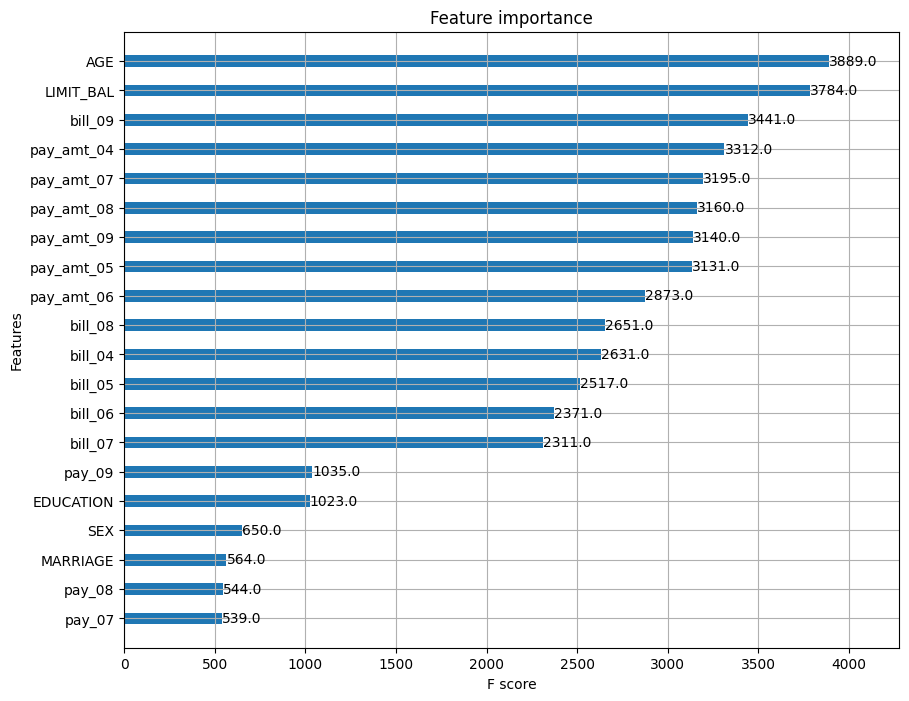

In [ ]:
# 파라미터의 중요도를 알아보자.
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(best_xgb_default, ax=ax, max_num_features=20, height=0.4)
plt.show()

# 나이가 가장 중요한 파라미터이고, 그 다음은 신용한도, 가장 최근 달의 청구서 금액 등이 있다.